In [66]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [67]:
import requests
from io import StringIO

In [68]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
source=requests.get(url).text
poll_data=StringIO(source)


In [69]:
poll_df=pd.read_csv(poll_data)

In [70]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 78.0+ KB


In [71]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


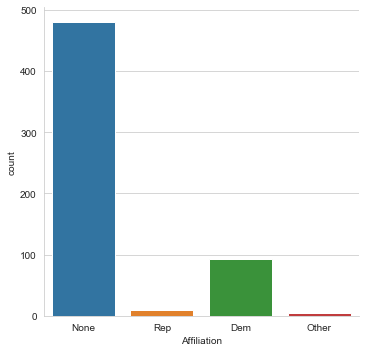

In [72]:
sns.factorplot('Affiliation',data=poll_df,kind='count')

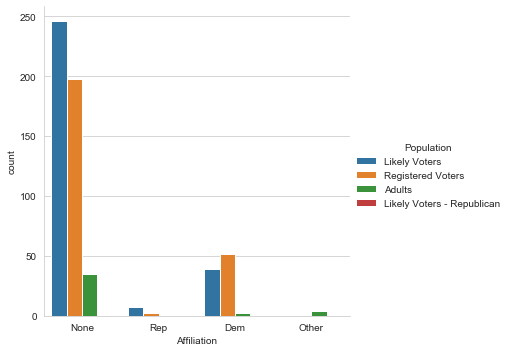

In [73]:
sns.factorplot('Affiliation',data=poll_df,kind='count',hue='Population')

In [74]:
avg=pd.DataFrame(poll_df.mean())


In [75]:
avg.drop('Number of Observations',axis=0,inplace=True)

In [76]:
avg.drop('Question Text',axis=0,inplace=True)

In [77]:
avg.drop('Question Iteration',axis=0,inplace=True)

In [78]:
avg.columns=['Average ratings']
avg

,Average ratings
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [79]:
std=pd.DataFrame(poll_df.std())

In [80]:
std.columns=['STD']

In [81]:
std.drop('Number of Observations',axis=0,inplace=True)

In [82]:
std.drop('Question Text',axis=0,inplace=True)
std.drop('Question Iteration',axis=0,inplace=True)

In [83]:
std


,STD
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


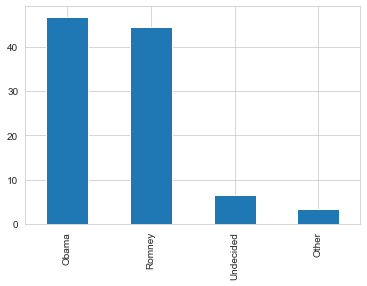

In [84]:
avg.plot(yerr=std,kind='bar',legend=False)

In [85]:
poll_avg=pd.concat([avg,std],axis=1)

In [86]:
poll_avg.columns=['Average','Standard deviation']

In [87]:
poll_avg

,Average,Standard deviation
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


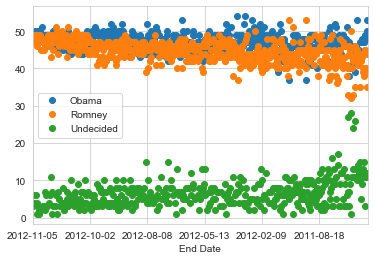

In [88]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o')

In [89]:
from datetime import datetime

In [90]:
poll_df['Difference']=(poll_df.Obama-poll_df.Romney)/100

In [91]:
poll_df=poll_df.drop('Question Text',axis=1)

In [92]:
poll_df=poll_df.drop('Question Iteration',axis=1)

In [93]:
poll_df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,PPP (D),2009-07-15,2009-07-16,2010-11-08T11:02:37Z,577.0,Registered Voters,Automated Phone,49.0,40.0,11.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,0.09
582,PPP (D),2009-06-12,2009-06-16,2010-11-08T10:58:00Z,638.0,Registered Voters,Automated Phone,48.0,40.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,0.08
583,PPP (D),2009-05-14,2009-05-18,2010-11-08T10:49:08Z,1000.0,Registered Voters,Automated Phone,53.0,35.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,0.18
584,PPP (D),2009-04-17,2009-04-19,2010-11-08T10:45:18Z,686.0,Registered Voters,Automated Phone,50.0,39.0,11.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,0.11


In [94]:
poll_df=poll_df.groupby(['Start Date'],as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,0.09


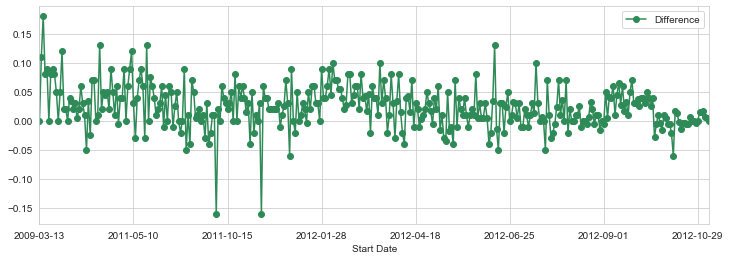

In [95]:
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='seagreen')

In [96]:
row_in=0
xlimit=[]
for date in poll_df['Start Date']:
    if date[0:7]=='2012-10':
        xlimit.append(row_in)
        row_in+=1
    else:
        row_in+=1
print (min(xlimit))
print (max(xlimit))

325
352


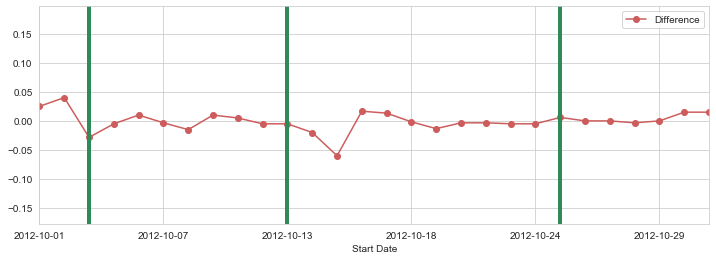

In [97]:
poll_df.plot('Start Date','Difference',figsize=(12,4),
             marker='o',color='indianred',xlim=(325,352))
plt.axvline(x=325+2,linewidth=4,color='seagreen')
plt.axvline(x=325+10,linewidth=4,color='seagreen')
plt.axvline(x=325+21,linewidth=4,color='seagreen')


In [98]:
pwd

'/Users/rinbaruah/Documents/Udemy Python Data Science'

In [99]:
donor_df=pd.read_csv('Election_Donor_Data.csv')

In [100]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [101]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [102]:
donor_df['contb_receipt_amt'].value_counts()

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [103]:
don_mean=donor_df['contb_receipt_amt'].mean()
don_std=donor_df['contb_receipt_amt'].std()
print('Average donation was {} with a standard deviation of {}'.format(np.round(don_mean,2),
                                                                       np.round(don_std,2)))

Average donation was 298.24 with a standard deviation of 3749.67


In [104]:
top_donor=donor_df['contb_receipt_amt'].copy()
top_donor.sort_values(ascending=False)
top_donor=top_donor[top_donor>0]

In [105]:
top_donor.sort_values().value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

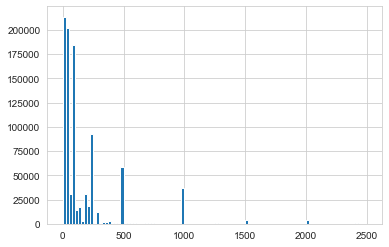

In [106]:
com_don=top_donor[top_donor<2500]
com_don.hist(bins=100)

In [107]:
candidates=donor_df.cand_nm.unique()

In [108]:
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [109]:
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}
donor_df['Party']=donor_df.cand_nm.map(party_map)

In [110]:
donor_df

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678,Republican
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican


In [111]:
donor_df=donor_df[donor_df.contb_receipt_amt>0]
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [112]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [113]:
cand_amount=donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
cand_amount

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

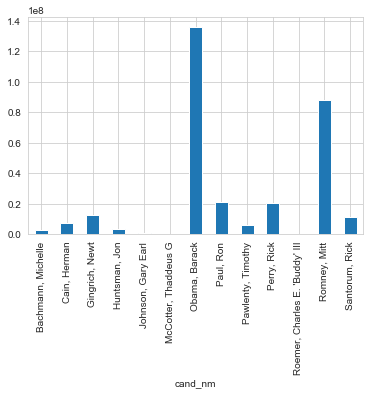

In [114]:
cand_amount.plot(kind='bar')

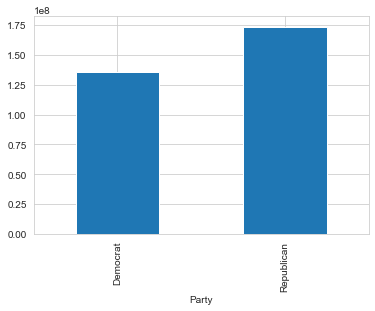

In [115]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [116]:
occupation_df=donor_df.pivot_table('contb_receipt_amt',index='contbr_occupation',
                                  columns='Party',aggfunc='sum')

In [117]:
occupation_df.head(20)

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.60
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.00
(RETIRED),NaN,250.00
-,5000.0,2114.80


In [118]:
occupation_df=occupation_df[occupation_df.sum(1)>1000000]
occupation_df

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,224084.40,1.259469e+06
BUSINESS OWNER,449979.30,1.323342e+06
C.E.O.,1690.00,2.592983e+06
CEO,2073284.79,1.618057e+06
CHAIRMAN,496547.00,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06


In [120]:
occupation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, ATTORNEY to WRITER
Data columns (total 2 columns):
Democrat      30 non-null float64
Republican    31 non-null float64
dtypes: float64(2)
memory usage: 744.0+ bytes


occupation_df.plot(kind='barh',figsize=(5,20),cmap='seismic')

In [129]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [131]:
occupation_df.loc['CEO']=occupation_df.loc['CEO']+occupation_df.loc['C.E.O.']
occupation_df.drop('C.E.O.',axis=0,inplace=True)

Joining the data of C.E.O. and CEO

Removing the C.E.O.

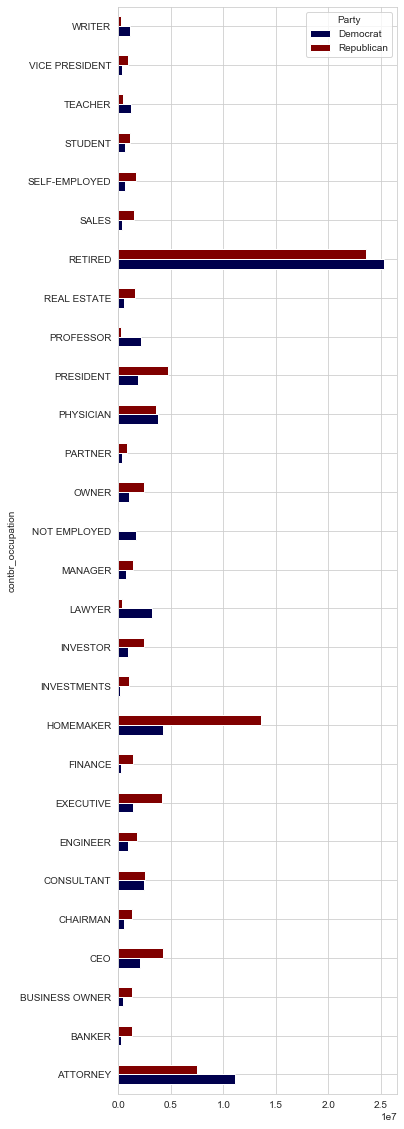

In [132]:
occupation_df.plot(kind='barh',figsize=(5,20),cmap='seismic')